In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
X = digits.data
y = digits.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [8]:
print(knn.score(X_test, y_test))

0.9833333333333333


In [9]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [10]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

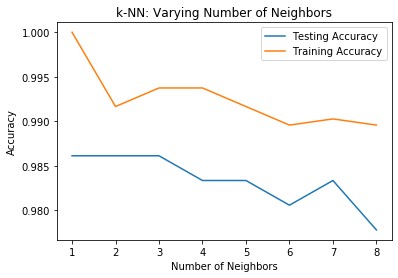

In [11]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#As we can see from the plot, it appears like the test accuracy is highest when using 3 and 5 neighbors. 7 isn't too bad, but using 8 neighbors or more seems to result in a simple model that under fits the data.

# 2. Support Vector Machine

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from sklearn import svm, datasets, metrics
digits=datasets.load_digits()

In [14]:
from sklearn.svm import SVC
svm =SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred =svm.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       0.95      1.00      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Compute and compare the accuracy scores to at least 3 different kernel

## Polynomial Kernel

In [17]:
from sklearn.svm import SVC
svm =SVC(kernel='poly', degree=8)
svm.fit(X_train,y_train)

C:\Users\drtu1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred =svm.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      0.92      0.94        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      0.94      0.96        35
           9       0.95      0.97      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Sigmoid Kernel

In [20]:
from sklearn.svm import SVC
svm =SVC(kernel='sigmoid')
svm.fit(X_train,y_train)

C:\Users\drtu1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred =svm.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.33      0.06      0.10        36
           2       0.00      0.00      0.00        35
           3       0.10      1.00      0.19        37
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00        36

    accuracy                           0.11       360
   macro avg       0.04      0.11      0.03       360
weighted avg       0.04      0.11      0.03       360



C:\Users\drtu1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Gaussian Kernel

In [23]:
from sklearn.svm import SVC
svm =SVC(kernel='rbf')
svm.fit(X_train,y_train)

C:\Users\drtu1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred =svm.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        36
           1       1.00      0.61      0.76        36
           2       1.00      0.63      0.77        35
           3       1.00      0.86      0.93        37
           4       1.00      0.56      0.71        36
           5       0.22      1.00      0.37        37
           6       1.00      0.69      0.82        36
           7       1.00      0.50      0.67        36
           8       1.00      0.20      0.33        35
           9       1.00      0.78      0.88        36

    accuracy                           0.64       360
   macro avg       0.92      0.64      0.70       360
weighted avg       0.92      0.64      0.70       360



### Comparison of Kernel Performance

If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes.

Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.

# 3. Naive bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score


In [27]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

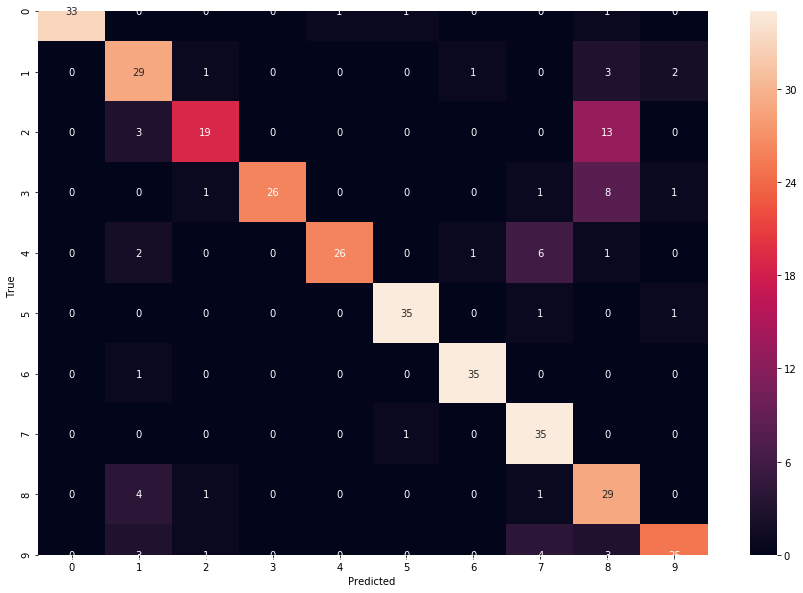

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted ')
plt.ylabel('True  ')
plt.show()

Text(0, 0.5, 'Accuracy')

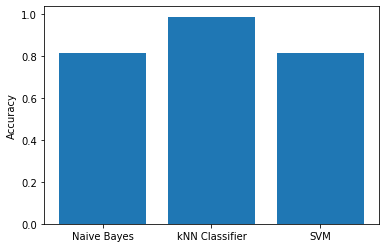

In [32]:
bayes_acc = accuracy_score(y_test, y_pred)
knn_acc = max(test_accuracy)
svm_acc = accuracy_score(y_test, y_pred)

plt.bar(['Naive Bayes', 'kNN Classifier', 'SVM'],[bayes_acc, knn_acc, svm_acc])
plt.ylabel('Accuracy')

# REGRESSION

# 1. Linear Regression

In [33]:
import pandas as pd
import seaborn as sn

df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


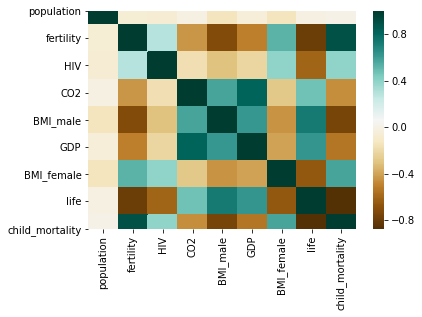

In [34]:
sn.heatmap(df.corr(), cmap='BrBG')

In [35]:
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [36]:
slr = LinearRegression()
X = df['fertility'].values.reshape(-1, 1) 
X = X.astype('float')
y = df['life'].values.reshape(-1, 1)
y = y.astype('float')
slr.fit(X, y)
y_pred = slr.predict(X)

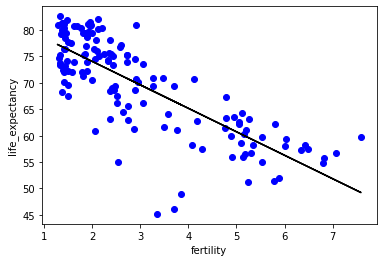

In [37]:
plt.scatter (X, y, c = 'blue')
plt.plot (X, y_pred, color = 'black')
plt.xlabel('fertility')
plt.ylabel('life_expectancy')
plt.show()

In [38]:
features = list(df.columns)
features = features[:-1]
features.pop(7)

'life'

In [39]:
features

['population',
 'fertility',
 'HIV',
 'CO2',
 'BMI_male',
 'GDP',
 'BMI_female',
 'child_mortality']

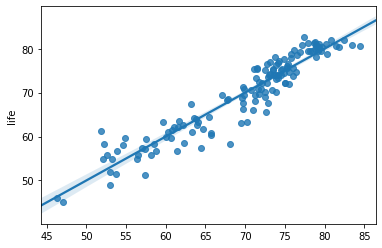

In [40]:
X_all = df[features]
slr.fit(X_all, y)
y_pred_all = slr.predict(X_all)
y_all = df['life']

sn.regplot(y_pred_all, y_all)

In [41]:
from sklearn.model_selection import cross_val_score
score_fertility = cross_val_score(slr, X, y)
print('Fertility: ', score_fertility)

Fertility:  [0.75397745 0.55557583 0.57886144]


C:\Users\drtu1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [42]:
score_fertility = cross_val_score(slr, X_all, y_all)
print("All features: ", score_fertility)

All features:  [0.83699524 0.87875694 0.89986165]


C:\Users\drtu1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
